# Demo for Lecture 7
- Linear Perceptron
- SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Perceptron Algorithm Demo
This algorithm is simple and provides a great intuition for how to use your data to find a great linear binary classifier. The perceptron algorithm is an __iterative__ algorithm. This means that we will constantly update our classifer __w__ until it performs well on our training data. Intuitively, we want use the points that our incorrectly classifies to help develop a better classifer. Lets see how our model improves across iterations:

In [107]:
#Plots our data points and Classifier
def plot_perceptron(X, w, c):
    plt.scatter(X[:,0], X[:,1], color=c)
    left = min(X[:,0])
    right = max(X[:,0])
    if w[2] != 0:
        plt.plot(np.linspace(left, right, num=50), [-(w[2] + w[0]*x)/w[1] for x in np.linspace(left, right, num=50)])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Perceptron Learning Example')
    plt.xlim([-3,3])
    plt.ylim([-4,4])
    plt.show()
    plt.close()


In [179]:
n = 100 # number of data points
lin_df = pd.read_csv("/Users/denizbt/Documents/info1998/resources/data/2d-lin-separable-data.csv")

X = lin_df[['X1', 'X2']].to_numpy()
offset = np.ones((n,1))
X = np.hstack((X, offset))

y = lin_df['Y1']
c = []
for i in range(n):
    if y[i] > 0:
        c.append('r')
    else:
        c.append('b')

model = Perceptron()
model.fit(X=lin_df[['X1', 'X2']], y=lin_df['Y1'])
w_true = np.append(model.coef_[0], model.intercept_[0])

plot_perceptron(X, w_true, c)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/denizbt/Documents/info1998/resources/data/2d-lin-separable-data.csv'

#### As you can see above, our goal is to find the line above that linearly separates our blue data points from our red data points. Let's use the perceptron algorithm to do this:

Slowly but surely our classifier is getting better! The intuition behind the perceptron is that we use the incorrectly classified points to change __w__ in order to make better guesses.

In [110]:
# Define the Perceptron class with a single-step update and convergence check
class My_Perceptron:
  def __init__(self, input_dim):
    self.weights = np.zeros(input_dim + 1)  # Initialize weights with an extra for bias term
    self.converged = False  # Track convergence status

  def predict(self, X):
    # Add bias term to each sample
    X_bias = np.c_[np.ones(X.shape[0]), X]
    return np.sign(np.dot(X_bias, self.weights))  # Predict using the sign of weighted sum
  
  def update_weights(self, X, y, learning_rate=1.0):
    # Update weights using a single misclassified sample, if found
    X_bias = np.c_[np.ones(X.shape[0]), X]
    for i in range(len(y)):
      if y[i] * np.dot(X_bias[i], self.weights) <= 0:  # Misclassified point
        self.weights += learning_rate * y[i] * X_bias[i]
        print(f"Updated weights: {self.weights}")
        return  # Only perform one update
  
  def check_convergence(self, X, y):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    predictions = np.sign(np.dot(X_bias, self.weights))
    self.converged = np.array_equal(predictions, y)  # Check if all predictions are correct
    return self.converged

In [134]:
# Function to plot data and decision boundary
def plot_decision_boundary(X, y, perceptron, title):
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
  
  # Plot decision boundary: w0 + w1*x + w2*y = 0 => y = -(w0 + w1*x) / w2
  x_values = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 200)
  if perceptron.weights[2] != 0:  # Avoid division by zero
      y_values = -(perceptron.weights[0] + perceptron.weights[1] * x_values) / perceptron.weights[2]
      plt.plot(x_values, y_values, color="black", label="Decision Boundary")
  
  plt.xlim([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
  plt.ylim([min(X[:, 1]) - 1, max(X[:, 1]) + 1])
  plt.title(title)
  plt.legend()
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


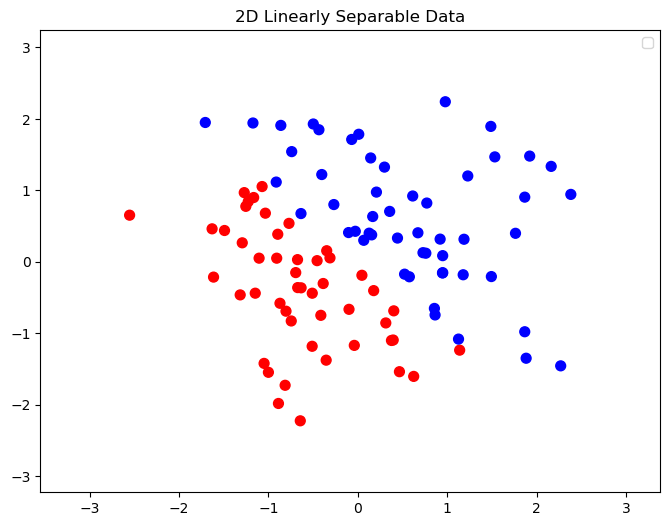

In [167]:
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Linearly separable labels

perceptron = My_Perceptron(input_dim=2)
plot_decision_boundary(X, y, perceptron, "2D Linearly Separable Data")

Updated weights: [0.         1.80481472 3.38096077]


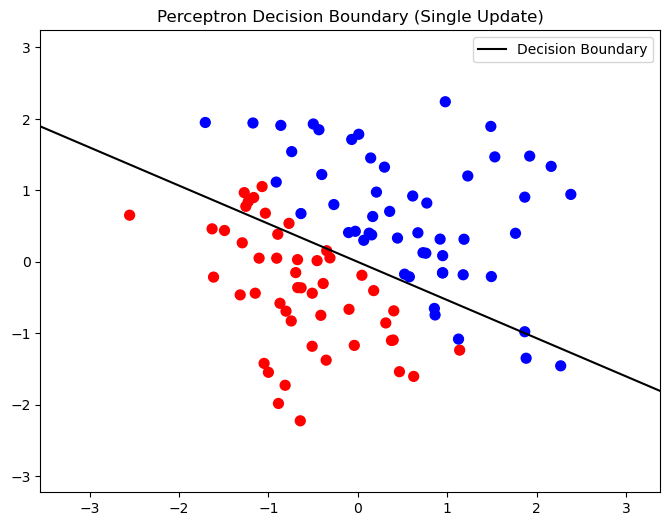

In [175]:
if not perceptron.check_convergence(X, y):
    perceptron.update_weights(X, y)
    plot_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary (Single Update)")
else:
    print("Perceptron has converged! No further updates needed.")
    plot_decision_boundary(X, y, perceptron, title="Perceptron Decision Boundary (Single Update)")

## SVM Demo

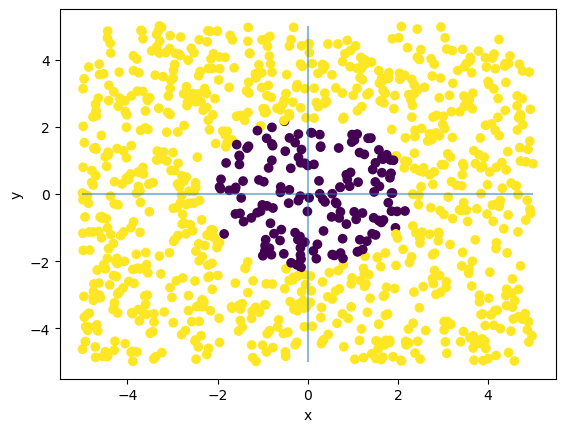

In [178]:
data = []
# randomly generate circular data
for i in range(0,1000):
    point = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    if point[0]**2 + point[1]**2 < 5:
        point.append(0)
    else:
        point.append(1)
    data.append(point)

data = np.asarray(data)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5); plt.hlines(0,-5,5,alpha=0.5)
plt.show()

In [69]:
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
# use radial kernal: rbf
classifier = SVC(kernel = 'rbf', gamma = 1)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

KeyboardInterrupt: 

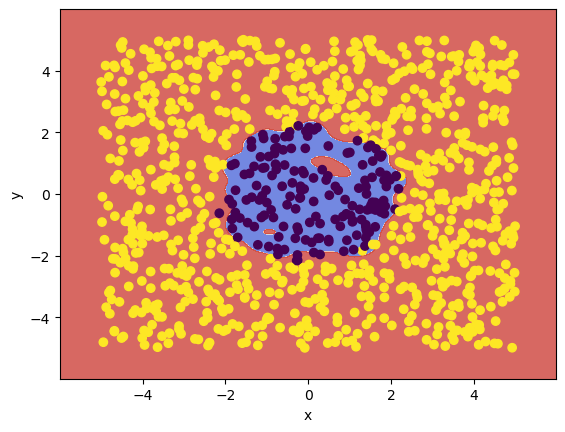

In [ ]:
# Change gamma
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
classifier = SVC(kernel = 'rbf', gamma = 7)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html - understand gammas better

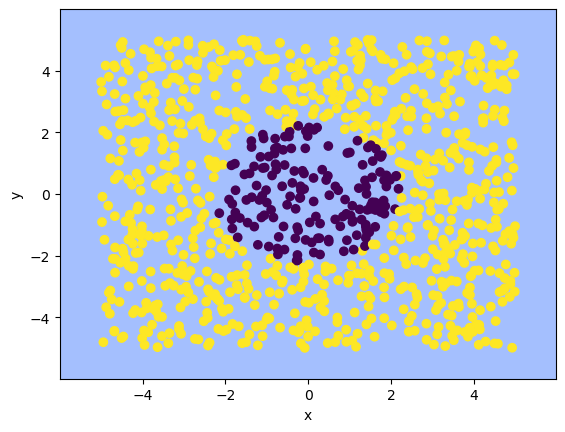

In [ ]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.show()

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ Nice blog post with effect of C and gamma on a different dataset